## Setup and Data Loading

In [2]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from car_scraper.analysis import CarValueAnalyzer

# Configure plotting
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

# Load data
analyzer = CarValueAnalyzer('../data/listings.csv')
df = analyzer.load_data()
df.head()

Loaded 560 car listings
After cleaning: 560 listings


,listing_hash,detail_url,price,kilometers,month_of_registration,year_of_registration,horsepower,fuel_type,gearbox,emission_class,co2_emissions,colour,manufacturer_colour,paint,upholstery_colour,upholstery,age_in_years,price_per_hp,kilometers_per_year
0,cc26221444734465da93792707650349,https://www.autoscout24.com/offers/peugeot-200...,16950,46230,10,2022,101,Gasoline,Manual,Euro 6,113.0,and Upholstery,Grijs,Metallic,Grey,colour,3.08,167.82,14994.0
1,f46f033efd36a44327bdb3e1c8a59867,https://www.autoscout24.com/offers/peugeot-200...,21945,27476,12,2020,155,Gasoline,Automatic,NaN,NaN,and Upholstery,Grijs metallic,Metallic,Black,colour,4.92,141.58,5588.0
2,81fbc59f2ed37a3626f00ce5ffa8ca65,https://www.autoscout24.com/offers/peugeot-200...,15888,131655,11,2020,131,Gasoline,Automatic,Euro 6,140.0,and Upholstery,Donker grijs metallic,Metallic,Black,colour,5.00,121.28,26331.0
3,a91bcdb90acfd3a366d287526455a763,https://www.autoscout24.com/offers/peugeot-200...,13250,141611,4,2021,101,Gasoline,Manual,Euro 6,105.0,and Upholstery,Wit,NaN,NaN,NaN,4.58,131.19,30897.0
4,563f2aef33adbd2ec89df410821e762a,https://www.autoscout24.com/offers/peugeot-200...,18895,73014,7,2020,131,Gasoline,Automatic,NaN,0.0,and Upholstery,Grijs metallic,Metallic,NaN,NaN,5.33,144.24,13690.0


## Data Overview

In [3]:
# Basic statistics
print(f"Dataset shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())

Dataset shape: (560, 19)

Data types:
listing_hash              object
detail_url                object
price                      int64
kilometers                 int64
month_of_registration      int64
year_of_registration       int64
horsepower                 int64
fuel_type                 object
gearbox                   object
emission_class            object
co2_emissions            float64
colour                    object
manufacturer_colour       object
paint                     object
upholstery_colour         object
upholstery                object
age_in_years             float64
price_per_hp             float64
kilometers_per_year      float64
dtype: object

Missing values:
listing_hash               0
detail_url                 0
price                      0
kilometers                 0
month_of_registration      0
year_of_registration       0
horsepower                 0
fuel_type                  0
gearbox                    0
emission_class           135
co2_emissions 

In [4]:
# Descriptive statistics
df[['price', 'kilometers', 'age_in_years', 'horsepower']].describe()

,price,kilometers,age_in_years,horsepower
count,560.000000,560.000000,560.000000,560.000000
mean,17830.419643,67860.241071,4.321661,119.776786
std,3860.385291,38030.232400,1.480581,16.402425
min,6450.000000,53.000000,0.500000,61.000000
25%,15450.000000,38660.500000,3.580000,102.000000
50%,17442.500000,63907.500000,4.670000,131.000000
75%,19900.000000,90645.250000,5.250000,131.000000
max,35995.000000,197742.000000,6.830000,185.000000


## Price Analysis

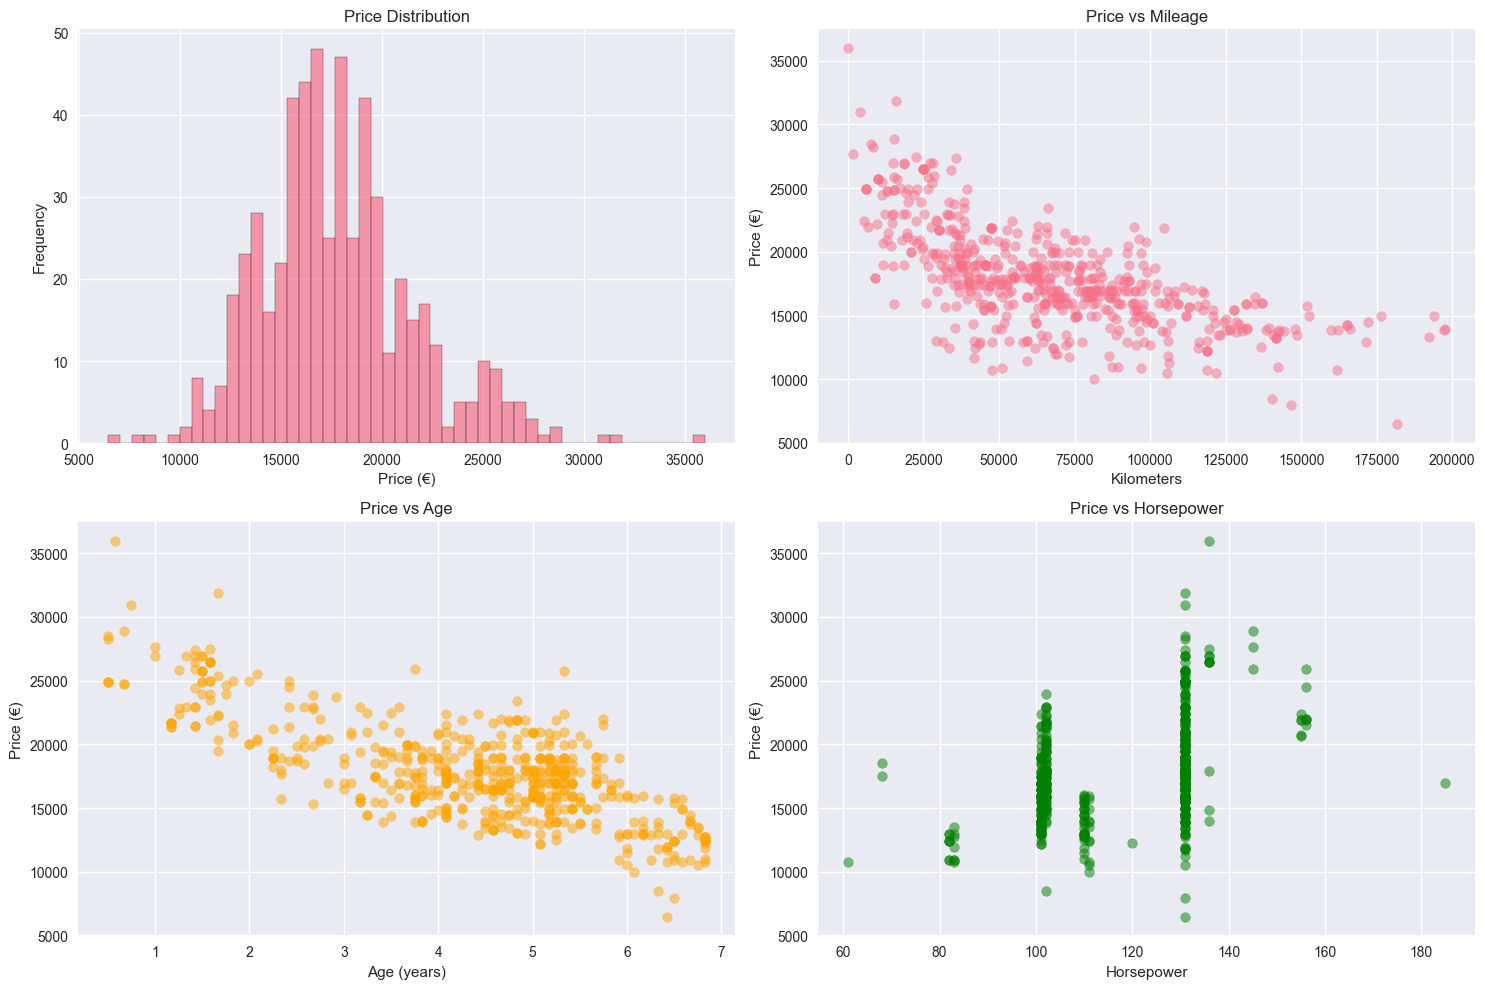

In [5]:
# Price distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Price histogram
axes[0,0].hist(df['price'], bins=50, alpha=0.7, edgecolor='black')
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price (€)')
axes[0,0].set_ylabel('Frequency')

# Price vs Mileage
axes[0,1].scatter(df['kilometers'], df['price'], alpha=0.5)
axes[0,1].set_title('Price vs Mileage')
axes[0,1].set_xlabel('Kilometers')
axes[0,1].set_ylabel('Price (€)')

# Price vs Age
axes[1,0].scatter(df['age_in_years'], df['price'], alpha=0.5, color='orange')
axes[1,0].set_title('Price vs Age')
axes[1,0].set_xlabel('Age (years)')
axes[1,0].set_ylabel('Price (€)')

# Price vs Horsepower
axes[1,1].scatter(df['horsepower'], df['price'], alpha=0.5, color='green')
axes[1,1].set_title('Price vs Horsepower')
axes[1,1].set_xlabel('Horsepower')
axes[1,1].set_ylabel('Price (€)')

plt.tight_layout()
plt.show()

## Fuel Type Analysis

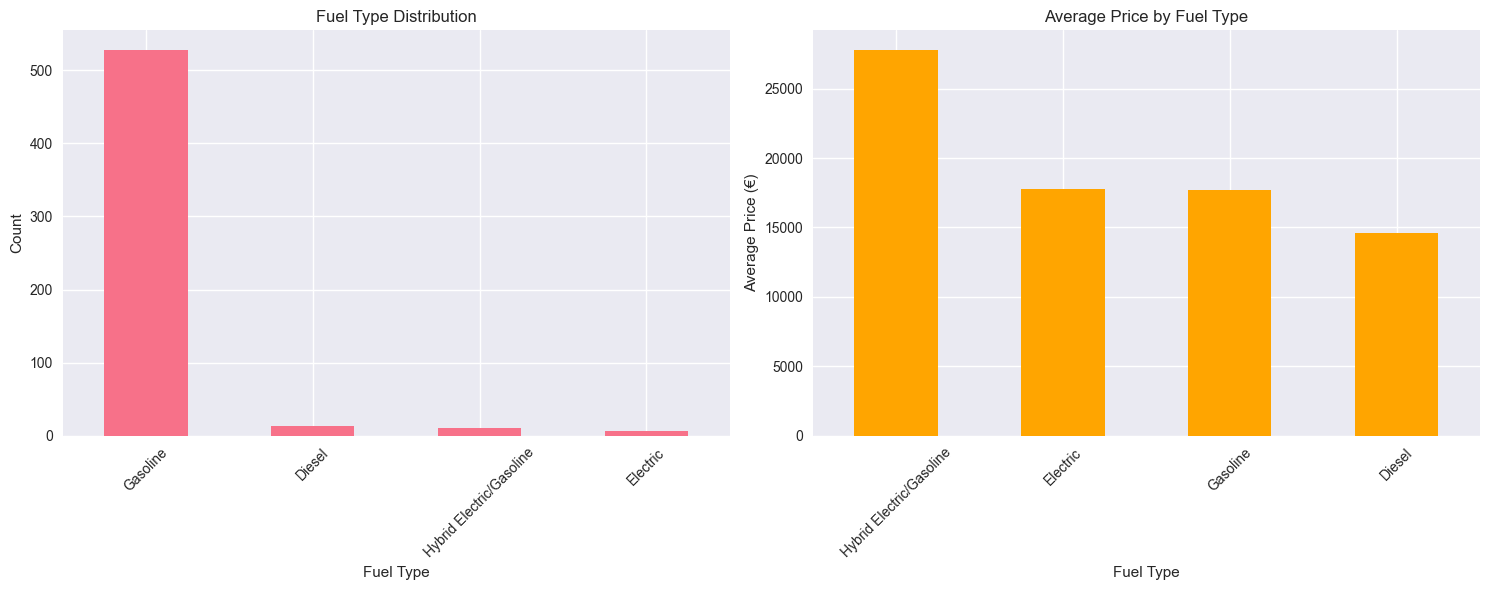

In [6]:
# Fuel type distribution and pricing
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count by fuel type
fuel_counts = df['fuel_type'].value_counts()
fuel_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Fuel Type Distribution')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Average price by fuel type
fuel_prices = df.groupby('fuel_type')['price'].mean().sort_values(ascending=False)
fuel_prices.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Average Price by Fuel Type')
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Average Price (€)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Correlation Analysis

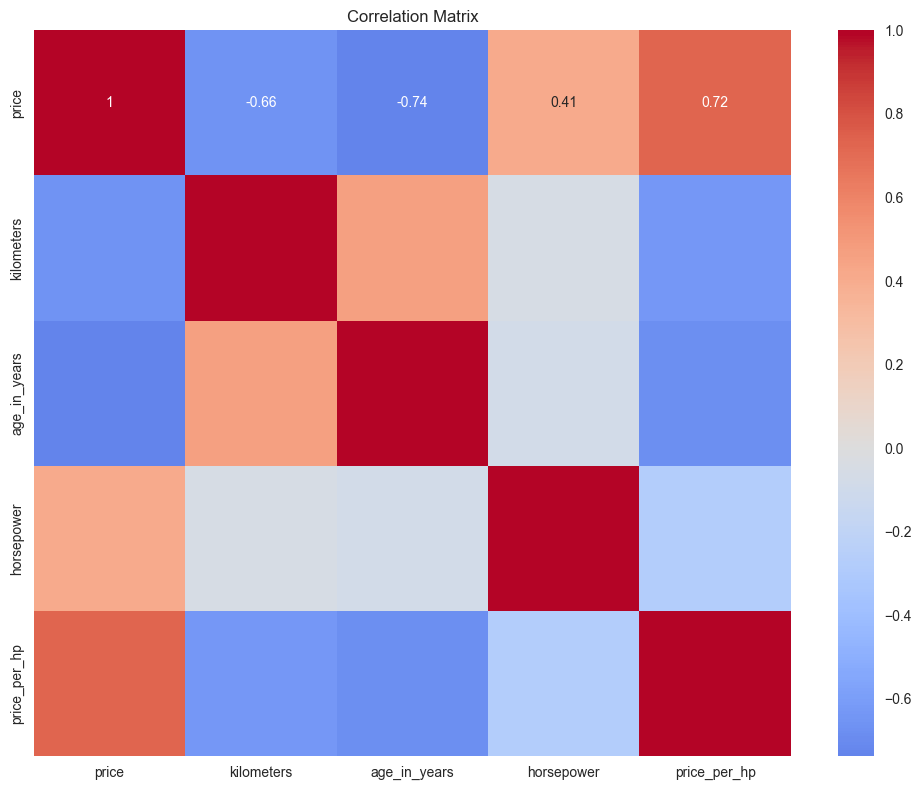

In [7]:
# Correlation matrix
numeric_cols = ['price', 'kilometers', 'age_in_years', 'horsepower', 'price_per_hp']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Value Analysis and Modeling

In [8]:
# Train the value prediction model
metrics = analyzer.train_model()
print("\nModel Performance:")
for metric, value in metrics.items():
    print(f"{metric.upper()}: {value:.3f}")

Model Performance:
R² Score: 0.885
RMSE: €1448
MAE: €1030

Model Performance:
MAE: 1030.234
MSE: 2096846.394
RMSE: 1448.049
R2: 0.885


In [9]:
# Calculate value scores
value_results = analyzer.calculate_value_score()
print("Value Score Distribution:")
print(analyzer.df['deal_category'].value_counts())

Value Score Distribution:
deal_category
Fair Deal         476
Good Deal          39
Overpriced         35
Excellent Deal     10
Name: count, dtype: int64


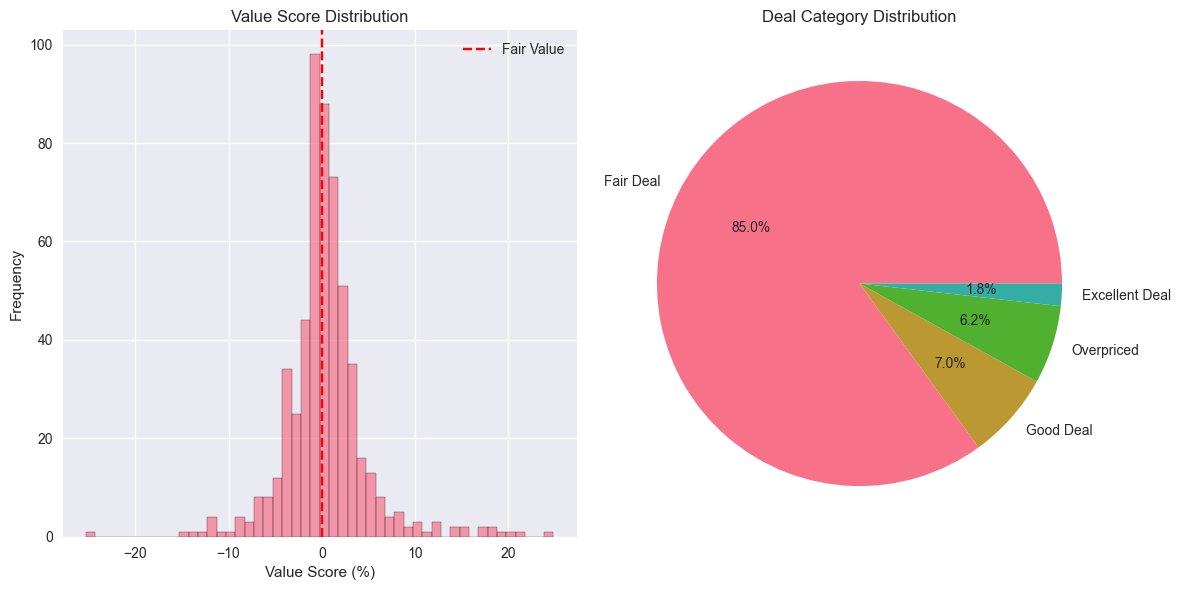

In [10]:
# Plot value score distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(analyzer.df['value_score'], bins=50, alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='Fair Value')
plt.title('Value Score Distribution')
plt.xlabel('Value Score (%)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
deal_counts = analyzer.df['deal_category'].value_counts()
plt.pie(deal_counts.values, labels=deal_counts.index, autopct='%1.1f%%')
plt.title('Deal Category Distribution')

plt.tight_layout()
plt.show()

## Best Deals

In [11]:
# Get top 20 best deals
best_deals = analyzer.get_best_deals(20)
print("Top 20 Best Value Cars:")
best_deals

Found 20 best deals from 560 cars matching criteria
Top 20 Best Value Cars:


,detail_url,price,predicted_price,value_score,kilometers,age_in_years,horsepower,fuel_type,deal_category
103,https://www.autoscout24.com/offers/peugeot-200...,6450,8579.22,24.818340,181601,6.42,131,Gasoline,Excellent Deal
76,https://www.autoscout24.com/offers/peugeot-200...,7950,10121.74,21.456192,146546,6.50,131,Gasoline,Excellent Deal
68,https://www.autoscout24.com/offers/peugeot-200...,14000,17656.34,20.708369,86821,4.92,136,Electric,Excellent Deal
79,https://www.autoscout24.com/offers/peugeot-200...,9995,12458.21,19.771781,81409,6.08,111,Gasoline,Excellent Deal
234,https://www.autoscout24.com/offers/peugeot-200...,10490,12819.14,18.169238,121946,6.00,111,Gasoline,Excellent Deal
81,https://www.autoscout24.com/offers/peugeot-200...,15999,19511.75,18.003254,74072,4.00,131,Gasoline,Excellent Deal
83,https://www.autoscout24.com/offers/peugeot-200...,16995,20651.98,17.707648,40000,5.08,185,Electric,Excellent Deal
108,https://www.autoscout24.com/offers/peugeot-200...,8450,10204.28,17.191610,140200,6.33,102,Diesel,Excellent Deal
70,https://www.autoscout24.com/offers/peugeot-200...,14350,17001.55,15.595931,41515,4.58,101,Gasoline,Excellent Deal
137,https://www.autoscout24.com/offers/peugeot-200...,10494,12429.72,15.573319,105693,6.75,131,Gasoline,Excellent Deal


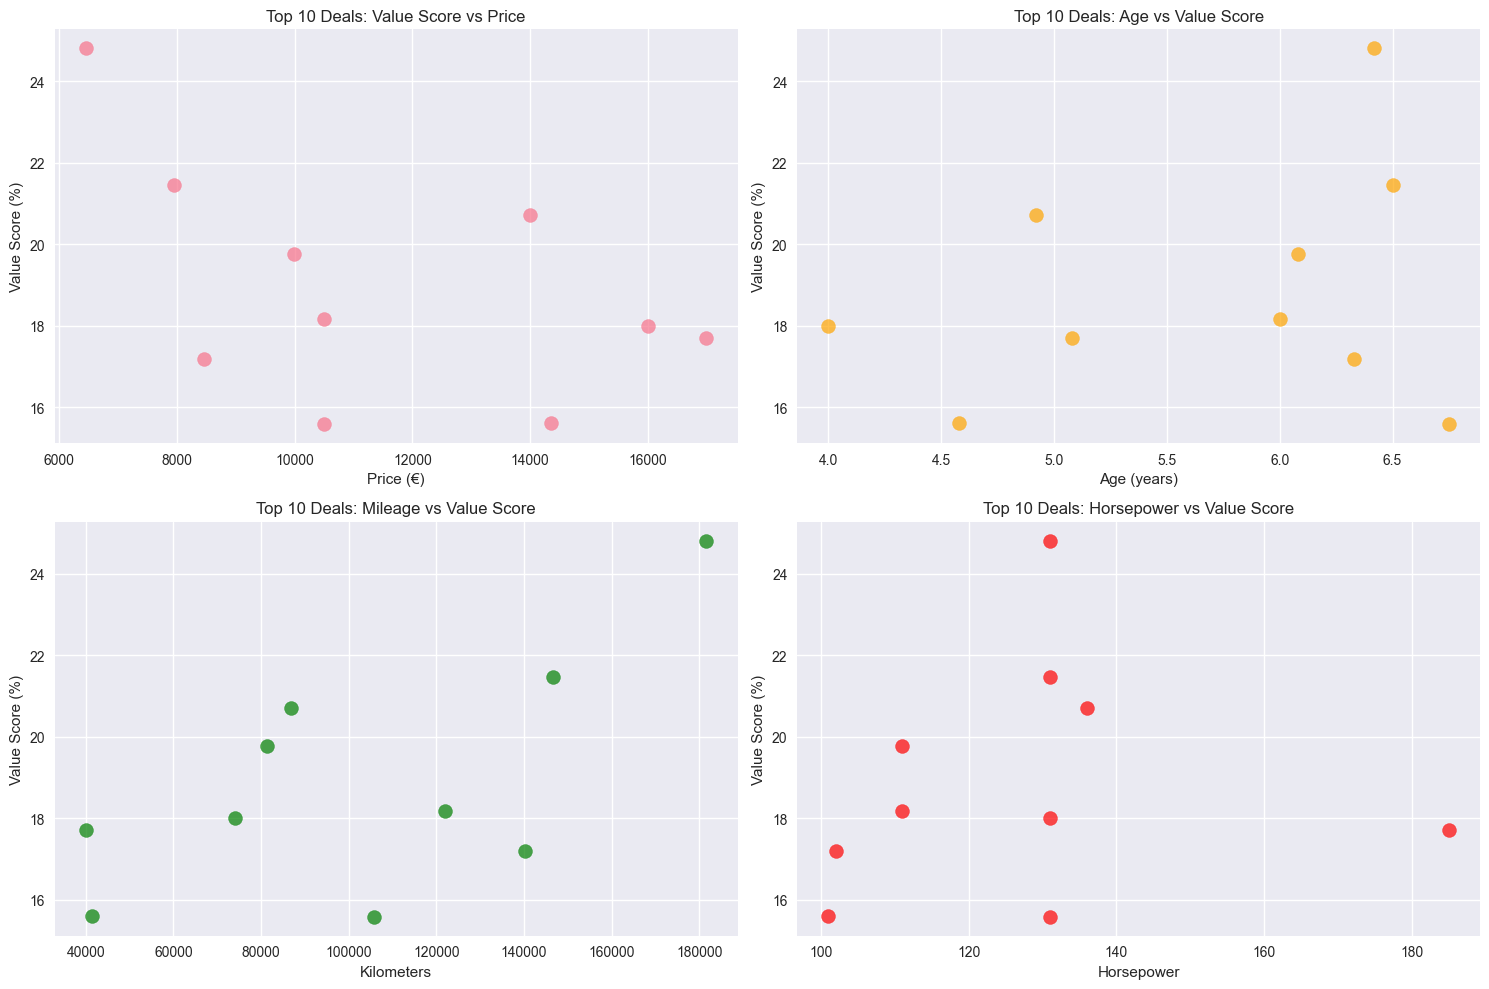

In [12]:
# Plot best deals
top_10 = best_deals.head(10)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Value score vs Price
axes[0,0].scatter(top_10['price'], top_10['value_score'], s=100, alpha=0.7)
axes[0,0].set_title('Top 10 Deals: Value Score vs Price')
axes[0,0].set_xlabel('Price (€)')
axes[0,0].set_ylabel('Value Score (%)')

# Age vs Value Score
axes[0,1].scatter(top_10['age_in_years'], top_10['value_score'], s=100, alpha=0.7, color='orange')
axes[0,1].set_title('Top 10 Deals: Age vs Value Score')
axes[0,1].set_xlabel('Age (years)')
axes[0,1].set_ylabel('Value Score (%)')

# Mileage vs Value Score
axes[1,0].scatter(top_10['kilometers'], top_10['value_score'], s=100, alpha=0.7, color='green')
axes[1,0].set_title('Top 10 Deals: Mileage vs Value Score')
axes[1,0].set_xlabel('Kilometers')
axes[1,0].set_ylabel('Value Score (%)')

# Horsepower vs Value Score
axes[1,1].scatter(top_10['horsepower'], top_10['value_score'], s=100, alpha=0.7, color='red')
axes[1,1].set_title('Top 10 Deals: Horsepower vs Value Score')
axes[1,1].set_xlabel('Horsepower')
axes[1,1].set_ylabel('Value Score (%)')

plt.tight_layout()
plt.show()

## Summary and Insights

In [13]:
# Summary statistics
print("=== ANALYSIS SUMMARY ===")
print(f"Total cars analyzed: {len(analyzer.df)}")
print(f"Average price: €{analyzer.df['price'].mean():.0f}")
print(f"Price range: €{analyzer.df['price'].min():,.0f} - €{analyzer.df['price'].max():,.0f}")
print(f"\nDeal Categories:")
for category, count in analyzer.df['deal_category'].value_counts().items():
    percentage = (count / len(analyzer.df)) * 100
    print(f"  {category}: {count} cars ({percentage:.1f}%)")

print(f"\nBest deal has {analyzer.df['value_score'].max():.1f}% value score")
print(f"Worst deal has {analyzer.df['value_score'].min():.1f}% value score")

=== ANALYSIS SUMMARY ===
Total cars analyzed: 560
Average price: €17830
Price range: €6,450 - €35,995

Deal Categories:
  Fair Deal: 476 cars (85.0%)
  Good Deal: 39 cars (7.0%)
  Overpriced: 35 cars (6.2%)
  Excellent Deal: 10 cars (1.8%)

Best deal has 24.8% value score
Worst deal has -25.3% value score


In [14]:
# Recommendations
excellent_deals = analyzer.df[analyzer.df['deal_category'] == 'Excellent Deal']
if len(excellent_deals) > 0:
    print(f"\n=== RECOMMENDATIONS ===")
    print(f"Found {len(excellent_deals)} excellent deals with >15% value score")
    print(f"\nTop 3 recommendations:")
    for i, (_, car) in enumerate(excellent_deals.head(3).iterrows(), 1):
        print(f"{i}. €{car['price']:,.0f} - {car['age_in_years']:.1f} years old, "
              f"{car['kilometers']:,.0f} km, {car['horsepower']} HP")
        print(f"   Value score: {car['value_score']:.1f}% (saves ~€{car['price_difference']:.0f})")
        print(f"   Link: {car['detail_url']}")
        print()
else:
    print("\nNo excellent deals found. Consider expanding search criteria.")


=== RECOMMENDATIONS ===
Found 10 excellent deals with >15% value score

Top 3 recommendations:
1. €14,000 - 4.9 years old, 86,821 km, 136 HP
   Value score: 20.7% (saves ~€3656)
   Link: https://www.autoscout24.com/offers/peugeot-2008-2008-ev-gt-pack-50-kwh-electric-black-72228807-12b4-47db-87b9-bee1ab6f1445?sort=standard&desc=0&lastSeenGuidPresent=true&position=56&search_id=yon2xdqqgm&source_otp=t10&ap_tier=t10&source=listpage_search-results&order_bucket=unknown&boosting_product=none&relevance_adjustment=organic&applied_boost_level=t10&boost_level=t10

2. €14,350 - 4.6 years old, 41,515 km, 101 HP
   Value score: 15.6% (saves ~€2652)
   Link: https://www.autoscout24.com/offers/peugeot-2008-1-2-puretech-active-apple-carplay-bluetooth-gasoline-grey-93bb43d7-c07d-44c8-b29b-de249621a948?sort=standard&desc=0&lastSeenGuidPresent=true&position=58&search_id=yon2xdqqgm&source_otp=t10&ap_tier=t10&source=listpage_search-results&order_bucket=unknown&boosting_product=none&relevance_adjustment=org